# Univariate Linear Regression on the Californina Housing Dataset

## Problem Statement

Our goal is to find the functional relationship between median housing value (dependent variable) and other independent variables such as median income, population and number of housebolds. We will use Linear regression model to predict the median housing value. Finally we will compare the results of the three trained models

Here is the link to the dataset [California Housing Dataset](https://www.kaggle.com/datasets/camnugent/california-housing-prices).

### Importing the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

### Reading the csv file and loading the data as dataframes using pandas

In [7]:
housingDataframe = pd.read_csv('https://raw.githubusercontent.com/hemasree798/CSCN8010-labs/main/data/housing.csv',sep=',')


## Exploratory Data Analysis

**Median Income** - Median income of households within a block. From the data we could infer that the median income is in the range between 0.499900 and 15.0001 ten of thousands of dollars. The average median income of the households in a block is 3.870.

**Households** - Total number of households within a block/unit - The minimum number of household is 1 and the maximum is 6082 per block

**Population** - the average population is 1425 people per block. 

I think there is a correlation between the number of hosuseholds and population within a block

**Median House Value** - The average housing price in Califorina is 2,06,855 US dollars. The maximum price of a house 5,00,000 US dollars.

From the plots it is clear that the houses whose price is more than 5,00,000 is given a default value of 5,00,000 which will not happen in the real case. So, it is better to remove those values from the dataset for better modelling of the data.



In [8]:
housingDataframe.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


## Seaborn Scatter Plots

### Median House Value Vs Median Income

The below scatterplot is plotted by taking median income in x axis and median housing value in y axis. For median income between 10000 US dollars and 100000 US Dollars, the median housing value varies between 25 thousand US dollar to 5 Lakh US Dollars.  

Text(0, 0.5, 'Median House Value (US Dollars)')

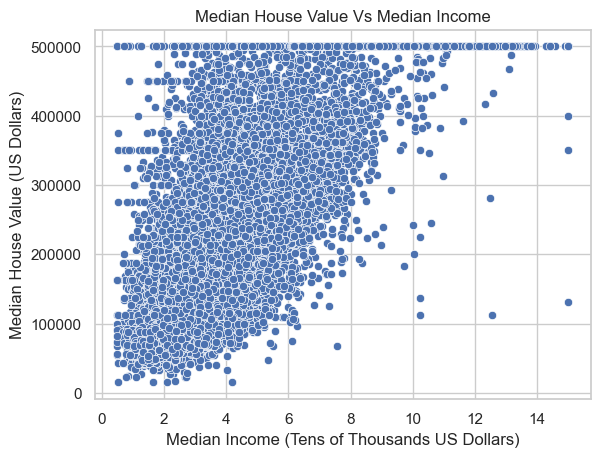

In [9]:
sns.set(style="whitegrid")
sns.scatterplot(data= housingDataframe, x= "median_income", y= "median_house_value").set(title = "Median House Value Vs Median Income")
plt.xlabel( "Median Income (Tens of Thousands US Dollars)" , size = 12 ) 
plt.ylabel( "Median House Value (US Dollars)" , size = 12 )

### Median House Value Vs Population

From the scatterplot we can find that for population size in the range of 0 to 500 the housing value ranges from 100000 US Dollars to 500000 US Dollars. I think with the population data alone we cannot predict the median housing value.

Text(0, 0.5, 'Median House Value (US Dollars)')

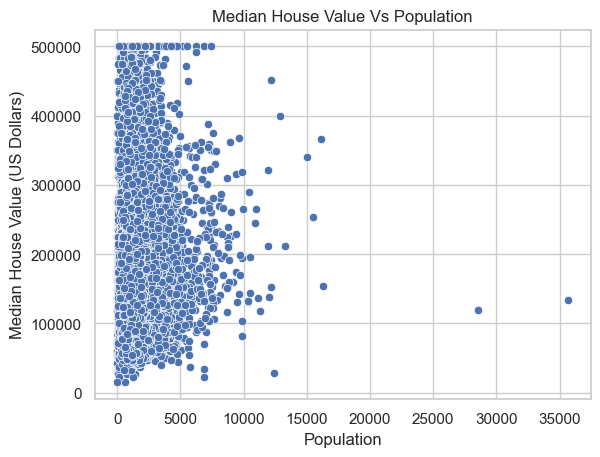

In [10]:
sns.scatterplot(data=housingDataframe, x="population", y="median_house_value").set(title = "Median House Value Vs Population")
plt.xlabel( "Population" , size = 12 ) 
plt.ylabel( "Median House Value (US Dollars)" , size = 12 )


### Median House Value Vs Number of households

For the total number of households in the range of 0 to 2000 the median housing value is almost between 1,00,000 to 4,00,000 US Dollars. The data points whose median housing value is 500001 can be removed as part of data preprocessing process. 

Text(0, 0.5, 'Median House Value (US Dollars)')

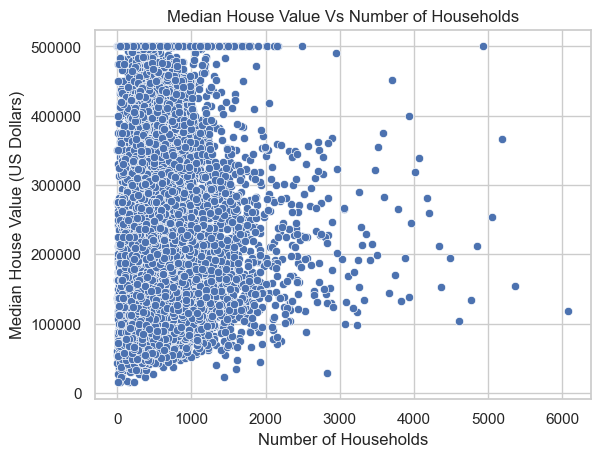

In [11]:
sns.scatterplot(data=housingDataframe, x="households", y="median_house_value").set(title = "Median House Value Vs Number of Households")
plt.xlabel( "Number of Households" , size = 12 ) 
plt.ylabel( "Median House Value (US Dollars)" , size = 12 )

## Defining and training the models

In [12]:
## median house value vs. median income
model_1 = LinearRegression()
model_1.fit(X= housingDataframe[["median_income"]],y=housingDataframe[["median_house_value"]])

## median house value vs. population
model_2 = LinearRegression()
model_2.fit(X= housingDataframe[["population"]],y=housingDataframe[["median_house_value"]])

## median house value vs. households
model_3 = LinearRegression()
model_3.fit(X= housingDataframe[["households"]],y=housingDataframe[["median_house_value"]])


LinearRegression()

## Evaluation Result Summary after training the models

In [13]:
## Mean Squared Error Calculation for the three models
MSE_1 = mean_squared_error(housingDataframe[['median_house_value']], model_1.predict(housingDataframe[['median_income']]))
MSE_2 = mean_squared_error(housingDataframe[['median_house_value']], model_2.predict(housingDataframe[['population']]))
MSE_3 = mean_squared_error(housingDataframe[['median_house_value']], model_3.predict(housingDataframe[['households']]))

## Mean Absolute Error Calculation for the three models
MAE_1 = mean_absolute_error(housingDataframe[['median_house_value']], model_1.predict(housingDataframe[['median_income']]))
MAE_2 = mean_absolute_error(housingDataframe[['median_house_value']], model_2.predict(housingDataframe[['population']]))
MAE_3 = mean_absolute_error(housingDataframe[['median_house_value']], model_3.predict(housingDataframe[['households']]))

## Intercepts
intercept1 = (model_1.intercept_).reshape(1)
intercept2 = (model_2.intercept_).reshape(1)
intercept3 = (model_3.intercept_).reshape(1)
intercepts = np.concatenate([intercept1,intercept2,intercept3])

##Slopes
slope1 = (model_1.coef_).reshape(1)
slope2 = (model_2.coef_).reshape(1)
slope3 = (model_3.coef_).reshape(1)
slopes = np.concatenate([slope1,slope2,slope3])


Results = {'Slope': slopes,'Intercept': intercepts, 'Mean Squared Error': [MSE_1,MSE_2,MSE_3],"Mean Absolute Error": [MAE_1,MAE_2,MAE_3]}
print(pd.DataFrame(data = Results,index = ["Model 1","Model 2", "Model 3"]))

                Slope      Intercept  Mean Squared Error  Mean Absolute Error
Model 1  41793.849202   45085.576703        7.011312e+09         62625.933791
Model 2     -2.511753  210436.262076        1.330741e+10         91153.820095
Model 3     19.872775  196928.577162        1.325778e+10         90802.743243


## Plotting Regression Line

### Graph showing the regression line plotted for Model 1 

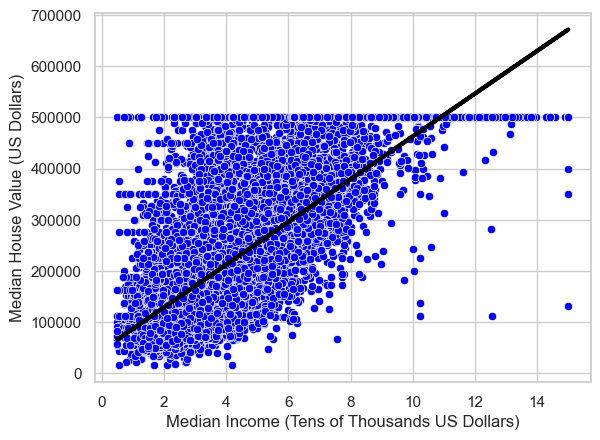

In [14]:
sns.scatterplot(data= housingDataframe, x= "median_income", y= "median_house_value",color = "blue")
plt.xlabel( "Median Income (Tens of Thousands US Dollars)" , size = 12 ) 
plt.ylabel( "Median House Value (US Dollars)" , size = 12 )
plt.plot(housingDataframe[["median_income"]], model_1.predict(housingDataframe[["median_income"]]),color = "black",linewidth = 3)
plt.show()

### Graph showing the regression line plotted for Model 2 

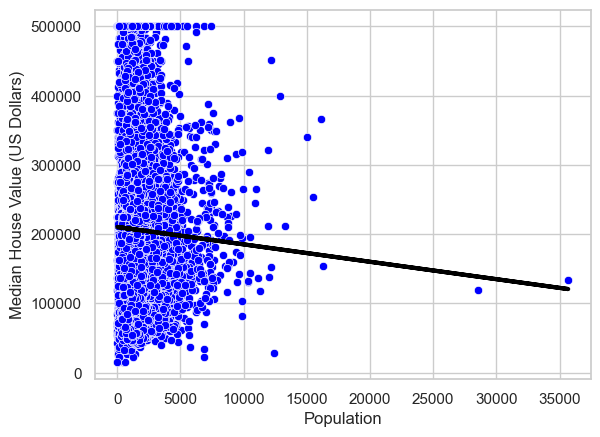

In [15]:
sns.scatterplot(data= housingDataframe, x= "population", y= "median_house_value",color = "blue")
plt.xlabel( "Population" , size = 12 ) 
plt.ylabel( "Median House Value (US Dollars)" , size = 12 )
plt.plot(housingDataframe[["population"]], model_2.predict(housingDataframe[["population"]]),color = "black",linewidth = 3)
plt.show()

### Graph showing the regression line plotted for Model 3 

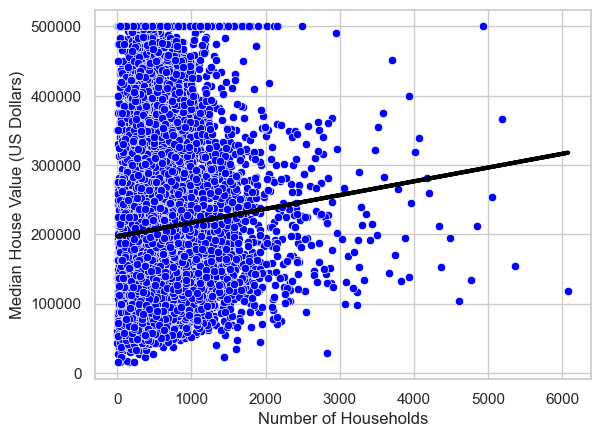

In [16]:
sns.scatterplot(data= housingDataframe, x= "households", y= "median_house_value",color = "blue")
plt.xlabel( "Number of Households" , size = 12 ) 
plt.ylabel( "Median House Value (US Dollars)" , size = 12 )
plt.plot(housingDataframe[["households"]], model_3.predict(housingDataframe[["households"]]),color = "black",linewidth = 3)
plt.show()

## Conclusion

In Conclusion, The model 1 performs better than the other two models because the Mean squared error of model 1 is less than the other two models. A smaller mean squared value indicates that the data points are normally distributed and it is close to the regression line. Also there are many outliers in model2 and model3 that can be removed as part of Data preprocessing step which will improve the model performance. 